In [1]:
# Make Jupyter Notebook full screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import datetime
import geopandas
import random
import math

In [3]:
print("GTFS data sets: ")
GTFS_DATA_PATH = "mmt_gtfs/"
import os; os.listdir(GTFS_DATA_PATH) # Peak whats in the directory 

GTFS data sets: 


['fare_attributes.txt',
 'transfers.txt',
 'agency.txt',
 'Metro_Transit_Bus_Routes.cpg',
 'Metro_Transit_Bus_Routes.shp',
 'Metro_Transit_Bus_Routes.shx',
 'fare_rules.txt',
 'calendar_dates.txt',
 'stop_times.txt',
 'Metro_Transit_Bus_Routes.dbf',
 'shapes.txt',
 'trips.txt',
 'feed_info.txt',
 'Metro_Transit_Bus_Routes.prj',
 'stops.txt',
 'linked_datasets.txt',
 'Metro_Transit_Ridership_by_Route_Weekday.csv',
 'stop_features.txt',
 'calendar.txt',
 'routes.txt',
 'translations.txt']

In [4]:
def getPandasDFCSV(path, file, sep=','):  
    """ Keyword Arg sep: deliminator used in txt file (default = ',')"""
    pandasDF = pd.read_csv(path +  file, sep=sep)
    return pandasDF

In [9]:
stop_times_df = getPandasDFCSV(GTFS_DATA_PATH, 'stop_times.txt')
#stop_times_df.info()
stop_times_df.head(3)

,trip_id,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled
0,9999999,1,7605,0,1,5:27:00,5:27:00,1,EAST TRANSFER,0.0249
1,9999999,2,7739,0,0,5:27:40,5:27:40,0,EAST TRANSFER,0.2003
2,9999999,3,7119,0,0,5:28:33,5:28:33,0,EAST TRANSFER,0.4352


In [11]:
# Fix the times from strings and bad formatting to datetime objects:

arrivalTimesArray = np.array(stop_times_df['arrival_time'])

arrivalTimesArrayFixed = []
for time in arrivalTimesArray:
    timeList = time.split(":")
    timeList = [int(time) for time in timeList]
    if timeList[0] < 24:
        dateTime = datetime.datetime(2000, 1, 1, timeList[0], timeList[1], timeList[2])
    else:
        dateTime = datetime.datetime(2000, 1, 2, timeList[0]-24, timeList[1], timeList[2])
    arrivalTimesArrayFixed.append(dateTime)
    
stop_times_df['arrival_time'] = arrivalTimesArrayFixed

departureTimesArray = np.array(stop_times_df['departure_time'])

departureTimesArrayFixed = []
for time in departureTimesArray:
    timeList = time.split(":")
    timeList = [int(time) for time in timeList]
    if timeList[0] < 24:
        dateTime = datetime.datetime(2000, 1, 1, timeList[0], timeList[1], timeList[2])
    else:
        dateTime = datetime.datetime(2000, 1, 2, timeList[0]-24, timeList[1], timeList[2])
    departureTimesArrayFixed.append(dateTime)
    
stop_times_df['departure_time'] = departureTimesArrayFixed

stop_times_df.head(3)

AttributeError: 'numpy.datetime64' object has no attribute 'split'

In [12]:
stop_times_df.head(3)

,trip_id,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled
0,9999999,1,7605,0,1,2000-01-01 05:27:00,2000-01-01 05:27:00,1,EAST TRANSFER,0.0249
1,9999999,2,7739,0,0,2000-01-01 05:27:40,2000-01-01 05:27:40,0,EAST TRANSFER,0.2003
2,9999999,3,7119,0,0,2000-01-01 05:28:33,2000-01-01 05:28:33,0,EAST TRANSFER,0.4352


In [13]:
trips_df = getPandasDFCSV(GTFS_DATA_PATH, 'trips.txt')
#trips_df.info()
trips_df.head(3)

,route_id,route_short_name,service_id,trip_id,trip_headsign,direction_id,direction_name,block_id,shape_id,shape_code,trip_type,trip_sort,wheelchair_accessible,bikes_allowed
0,9041,16,92_WKD,9999999,EAST TRANSFER,0,East Transfer,193133,55293,P16E,D,19620,1,1
1,9028,2,92_WKD,1007843,NORTH TRANSFER: VIA SHERMAN,0,North Transfer,194263,55156,2S,W,20100,1,1
2,9028,2,92_WKD,1007844,NORTH TRANSFER: VIA FORDEM,0,North Transfer,194056,55154,2F,W,21600,1,1


In [14]:
stops_df = getPandasDFCSV(GTFS_DATA_PATH, 'stops.txt')
#stops_df.info()
stops_df.head(3)

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,agency_id,jurisdiction_id,location_type,parent_station,relative_position,cardinal_direction,wheelchair_boarding,primary_street,address_range,cross_location
0,1110,1110,E Dayton & Wisconsin (WB),This EVENT/DETOUR ONLY stop (#1110) is westbou...,43.076428,-89.385920,MMT,CMAD,0,NaN,3,270.0,1,E Dayton,2,Wisconsin
1,1111,1111,W Doty & M L K Junior (EB),This EVENT/DETOUR ONLY stop (#1111) is eastbou...,43.072938,-89.382354,MMT,CMAD,0,NaN,3,90.0,1,W Doty,1,M L K Junior
2,1124,1124,S Fairchild & W Main (SB),This EVENT/DETOUR ONLY stop (#1124) is southbo...,43.072467,-89.385273,MMT,CMAD,0,NaN,3,180.0,1,S Fairchild,98,W Main


In [15]:
print("list of possible trips: \n")

service_id_list = []
for i in trips_df['service_id']:
    if i not in service_id_list:
        service_id_list.append(i)
print(service_id_list)

list of possible trips: 

['92_WKD', '92_SAT', '92_SUN', '92_HOL', '92_MWK', '92_WKD:R', '92_SAT:R', '92_SUN:R', '92_HOL:R', '92_SAT:L', '92_SUN:L', '92_WKD:L#6', '92_WKD:L=6', '92_WKD:S', '92_SAT:S', '92_SUN:S', '92_WKD:S#6', '92_WKD:S=6']


In [16]:
print("list of possible routes: \n")

route_short_name_list = []
for i in trips_df['route_short_name']:
    if i not in route_short_name_list:
        route_short_name_list.append(i)

route_short_name_list.sort()
print(route_short_name_list)

list of possible routes: 

[2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 36, 39, 40, 44, 48, 49, 50, 51, 52, 55, 59, 63, 67, 68, 70, 72, 73, 75, 78, 80, 81, 82, 84]


In [17]:
trips_df_weekday_peak = trips_df[trips_df['service_id'] == '92_WKD']
trips_df_weekday_peak_R = trips_df[trips_df['service_id'] == '92_WKD:R']
trips_df_weekday_peak_s = trips_df[trips_df['service_id'] == '92_WKD:L#6']
trips_df_weekday_peak_s3 = trips_df[trips_df['service_id'] == '92_WKD:L=6']
trips_df_weekday_peak_s1 = trips_df[trips_df['service_id'] == '92_WKD:S']
trips_df_weekday_peak_s2 = trips_df[trips_df['service_id'] == '92_WKD:S#6']
trips_df_weekday_peak_s4 = trips_df[trips_df['service_id'] == '92_WKD:S=6']

dfs_wk = [trips_df_weekday_peak, trips_df_weekday_peak_R, trips_df_weekday_peak_s, 
          trips_df_weekday_peak_s1, trips_df_weekday_peak_s2, trips_df_weekday_peak_s4]

trips_df_weekday = pd.concat(dfs_wk)
#trips_df_weekday.info()

In [18]:
print("Routes for weekday trips: \n")

routes_wk_list = []
for route in trips_df_weekday['route_short_name']:
    if route not in routes_wk_list:
        routes_wk_list.append(route)

routes_wk_list.sort()
print(routes_wk_list)

Routes for weekday trips: 

[2, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 26, 27, 30, 31, 32, 33, 36, 39, 40, 44, 48, 49, 50, 51, 52, 55, 67, 70, 72, 73, 75, 80, 81, 82, 84]


In [19]:
# make a dictionary of routes with trip ID's for weekday service:
print("Dictionary of all the possible trips for each route during weekdays: \n\n Example output for 10 trips in route 2: \n")

tripIDList_forRoutes_weekday92 = dict()
for i in routes_wk_list:
    trip_list = []
    for j in trips_df_weekday[trips_df_weekday['route_short_name'] == i].iterrows():
        trip_list.append(j[1]['trip_id'])
    tripIDList_forRoutes_weekday92[i] = trip_list

print(tripIDList_forRoutes_weekday92[2][:10])

Dictionary of all the possible trips for each route during weekdays: 

 Example output for 10 trips in route 2: 

[1007843, 1007844, 1007499, 1007497, 1007481, 1007496, 1007480, 1007495, 1007479, 1007494]


In [30]:
stop_times_df[stop_times_df['trip_id']==1007843]

,trip_id,stop_sequence,stop_id,pickup_type,drop_off_type,arrival_time,departure_time,timepoint,stop_headsign,shape_dist_traveled
20,1007843,1,6100,0,1,2000-01-01 05:35:00,2000-01-01 05:35:00,1,NORTH TRANSFER: VIA SHERMAN,0.0097
21,1007843,2,2925,0,0,2000-01-01 05:36:02,2000-01-01 05:36:02,0,NORTH TRANSFER: VIA SHERMAN,0.3175
22,1007843,3,2401,0,0,2000-01-01 05:37:12,2000-01-01 05:37:12,0,NORTH TRANSFER: VIA SHERMAN,0.6611
23,1007843,4,2249,0,0,2000-01-01 05:37:55,2000-01-01 05:37:55,0,NORTH TRANSFER: VIA SHERMAN,0.8757
24,1007843,5,2669,0,0,2000-01-01 05:38:32,2000-01-01 05:38:32,0,NORTH TRANSFER: VIA SHERMAN,1.0579
25,1007843,6,2201,0,0,2000-01-01 05:39:04,2000-01-01 05:39:04,0,NORTH TRANSFER: VIA SHERMAN,1.2175
26,1007843,7,2121,0,0,2000-01-01 05:39:59,2000-01-01 05:39:59,0,NORTH TRANSFER: VIA SHERMAN,1.4903
27,1007843,8,2175,0,0,2000-01-01 05:41:00,2000-01-01 05:41:00,1,NORTH TRANSFER: VIA SHERMAN,1.7755
28,1007843,9,2101,0,0,2000-01-01 05:41:56,2000-01-01 05:41:56,0,NORTH TRANSFER: VIA SHERMAN,1.9756
29,1007843,10,2395,0,0,2000-01-01 05:42:32,2000-01-01 05:42:32,0,NORTH TRANSFER: VIA SHERMAN,2.1058


In [25]:
hours = [i for i in range(24)]
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [63]:
route_freq_all = dict()

for route in routes_wk_list:
    route_frequency = dict()
    for trip in tripIDList_forRoutes_weekday92[route]:
        midpoint = int(len(stop_times_df[stop_times_df['trip_id']==trip])/2)
        localDF = stop_times_df[stop_times_df['trip_id']==trip]
        time = localDF.loc[localDF['stop_sequence']==midpoint, 'arrival_time'].item()
        hour = time.hour
        if hour not in route_frequency:
            route_frequency[hour] = 1
        else:
            route_frequency[hour] += 1
    
    route_freq_all[route] = route_frequency
        
#route_freq_all

In [114]:
m = [[0]*24 for i in range(len(routes_wk_list)-1)]
w = [[0]*len(routes_wk_list) for i in range(24)]
for i, route in enumerate(routes_wk_list):
    print("i ", i, " route ", route)
    if route == 80:
        continue
    for j in range(24):
        if j in route_freq_all[route]:
            m[i][j] = route_freq_all[route][j]
            w[j][i] = route_freq_all[route][j]
    print(m[i])
    print()
        

i  0  route  2
[0, 0, 0, 0, 0, 2, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1]

i  1  route  4
[0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0]

i  2  route  5
[0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 2, 2, 3, 1]

i  3  route  6
[0, 0, 0, 0, 0, 1, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 1]

i  4  route  7
[0, 0, 0, 0, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0]

i  5  route  8
[0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 0]

i  6  route  10
[0, 0, 0, 0, 0, 0, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 2, 0, 0, 0, 0, 0]

i  7  route  11
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0]

i  8  route  12
[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0]

i  9  route  13
[0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1]

i  10  route  15
[0, 0, 0, 0, 0, 0, 3, 4, 4, 3, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 0]

i  11  route  1

IndexError: list index out of range

<ipython-input-147-740df5e387f1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(routes_wk_list))
<ipython-input-147-740df5e387f1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(["12am", "2am", "4am", "6am", "8am", "10am", "12pm", "2pm", "4pm", "6pm", "8pm", "10pm"])


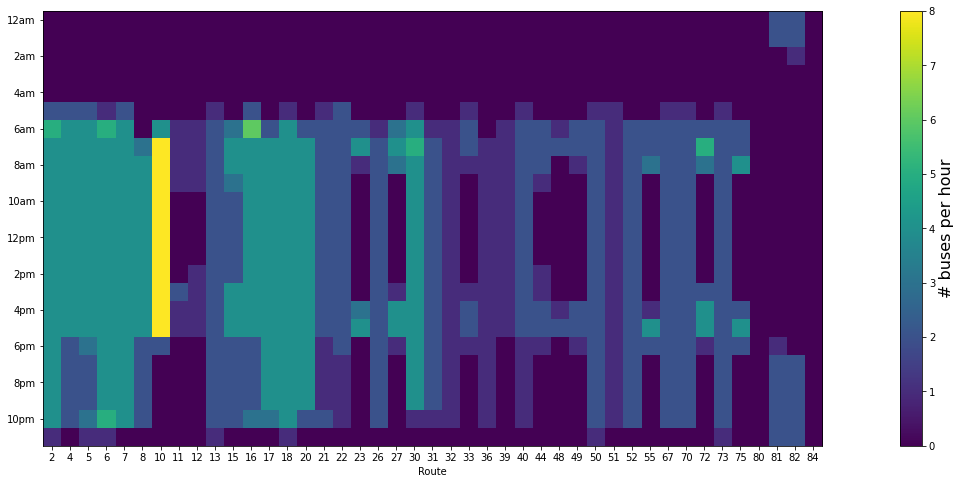

In [147]:
ax = plt.subplots(figsize=(28, 8))[1]

plt.imshow(w, cmap='viridis', interpolation='nearest')

ax.set_xticklabels(list(routes_wk_list))
ax.set_xticks(range(0, len(routes_wk_list)))

ax.set_yticklabels(["12am", "2am", "4am", "6am", "8am", "10am", "12pm", "2pm", "4pm", "6pm", "8pm", "10pm"])
ax.set_yticks(range(0, 24, 2))

cbar = plt.colorbar(ax=ax)
cbar.set_label('# buses per hour', fontsize=16)

plt.xlabel("Route")
plt.savefig('PaperFigures/FrequencyHeatMap', bbox_inches='tight')
plt.show()